In [1]:
library(forecast)
library(tseries)
library(readr)
library(dplyr)
library(ggplot2)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
# Load your data
CocoaPrice_data<- read.csv("CocoaPrice.csv")

### DATA PREPARATION

In [3]:
missing_values<- sum(is.na(CocoaPrice_data))
missing_values

[1] 0

In [4]:
CocoaPrice_data$Date <- as.Date(CocoaPrice_data$Date, "%Y-%m-%d")
cocoa_ts <- ts(CocoaPrice_data$Price, start=c(1994, 10), frequency=12)

In [5]:
str(cocoa_ts)

 Time-Series [1:354] from 1995 to 2024: 1448 1437 1399 1469 1511 ...


In [6]:
cocoa_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1994,,,,,,,,,,1447.95,1437.05,1399.43
1995,1468.86,1510.55,1484.91,1469.26,1445.32,1437.14,1364.10,1413.00,1396.86,1394.50,1436.50,1378.84
1996,1349.50,1369.81,1338.62,1456.24,1524.09,1537.60,1495.70,1499.86,1476.14,1477.04,1469.33,1474.30
1997,1428.45,1372.70,1523.60,1571.05,1568.29,1688.38,1677.30,1652.14,1769.64,1741.43,1694.80,1737.29
1998,1668.10,1640.85,1719.18,1726.38,1794.35,1721.86,1712.17,1683.62,1687.32,1646.41,1388.52,1288.09
1999,1254.90,1257.40,1206.52,1108.00,998.75,1119.73,1074.77,980.86,1009.86,954.57,893.64,909.14
2000,906.38,874.14,966.70,962.95,1003.68,991.00,996.62,970.35,1013.57,1027.73,936.09,893.75
2001,1031.86,1257.00,1236.73,1212.60,1233.23,1140.10,1123.82,1147.17,1118.85,1197.35,1397.77,1497.00
2002,1567.59,1713.35,1815.35,1770.91,1749.78,1734.60,1881.78,2004.27,2206.19,2246.57,1811.29,1985.00
2003,2055.27,2076.40,1847.48,1774.86,1515.81,1352.76,1372.35,1410.62,1450.73,1265.57,1289.90,1324.14


## EXPLORATORY DATA ANALYSIS

In [7]:
names(CocoaPrice_data)

[1] "Date"  "Price"

In [8]:
summary(cocoa_ts)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  874.1  1396.1  1806.0  1853.0  2168.5  6510.2 

In [9]:
class(cocoa_ts)

[1] "ts"

In [10]:
 typeof(cocoa_ts)

[1] "double"

In [11]:
 time(cocoa_ts)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1994,,,,,,,,,,1994.750,1994.833,1994.917
1995,1995.000,1995.083,1995.167,1995.250,1995.333,1995.417,1995.500,1995.583,1995.667,1995.750,1995.833,1995.917
1996,1996.000,1996.083,1996.167,1996.250,1996.333,1996.417,1996.500,1996.583,1996.667,1996.750,1996.833,1996.917
1997,1997.000,1997.083,1997.167,1997.250,1997.333,1997.417,1997.500,1997.583,1997.667,1997.750,1997.833,1997.917
1998,1998.000,1998.083,1998.167,1998.250,1998.333,1998.417,1998.500,1998.583,1998.667,1998.750,1998.833,1998.917
1999,1999.000,1999.083,1999.167,1999.250,1999.333,1999.417,1999.500,1999.583,1999.667,1999.750,1999.833,1999.917
2000,2000.000,2000.083,2000.167,2000.250,2000.333,2000.417,2000.500,2000.583,2000.667,2000.750,2000.833,2000.917
2001,2001.000,2001.083,2001.167,2001.250,2001.333,2001.417,2001.500,2001.583,2001.667,2001.750,2001.833,2001.917
2002,2002.000,2002.083,2002.167,2002.250,2002.333,2002.417,2002.500,2002.583,2002.667,2002.750,2002.833,2002.917
2003,2003.000,2003.083,2003.167,2003.250,2003.333,2003.417,2003.500,2003.583,2003.667,2003.750,2003.833,2003.917


In [12]:
 cycle(cocoa_ts)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1994,,,,,,,,,,10,11,12
1995,1,2,3,4,5,6,7,8,9,10,11,12
1996,1,2,3,4,5,6,7,8,9,10,11,12
1997,1,2,3,4,5,6,7,8,9,10,11,12
1998,1,2,3,4,5,6,7,8,9,10,11,12
1999,1,2,3,4,5,6,7,8,9,10,11,12
2000,1,2,3,4,5,6,7,8,9,10,11,12
2001,1,2,3,4,5,6,7,8,9,10,11,12
2002,1,2,3,4,5,6,7,8,9,10,11,12
2003,1,2,3,4,5,6,7,8,9,10,11,12


In [13]:
start(cocoa_ts)

[1] 1994   10

In [14]:
end(cocoa_ts)

[1] 2024    3

In [15]:
frequency(cocoa_ts)

[1] 12

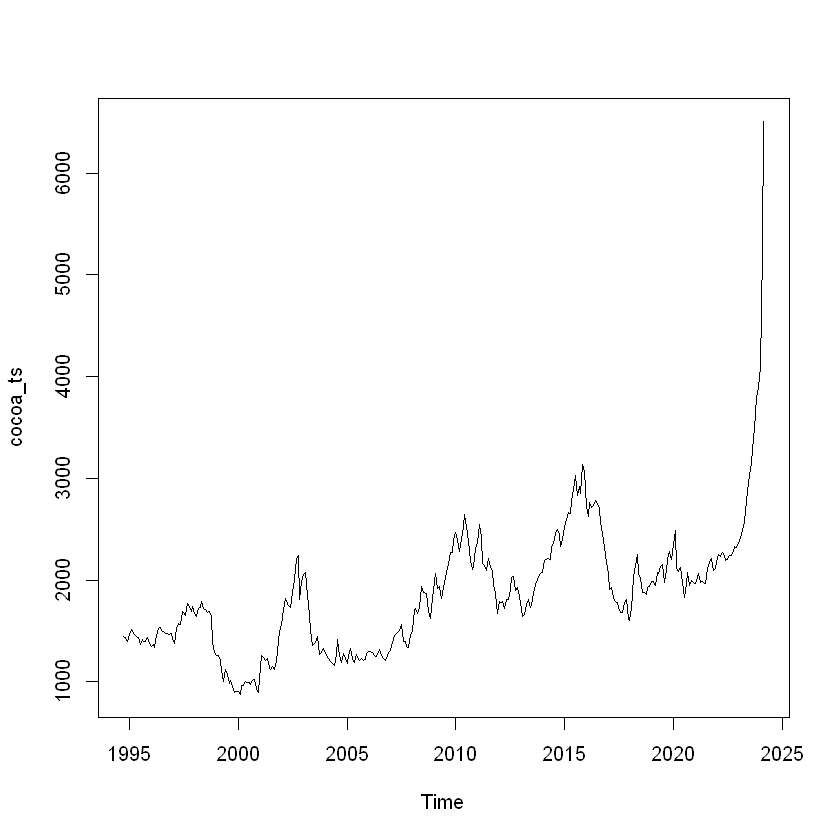

In [16]:
plot(cocoa_ts)

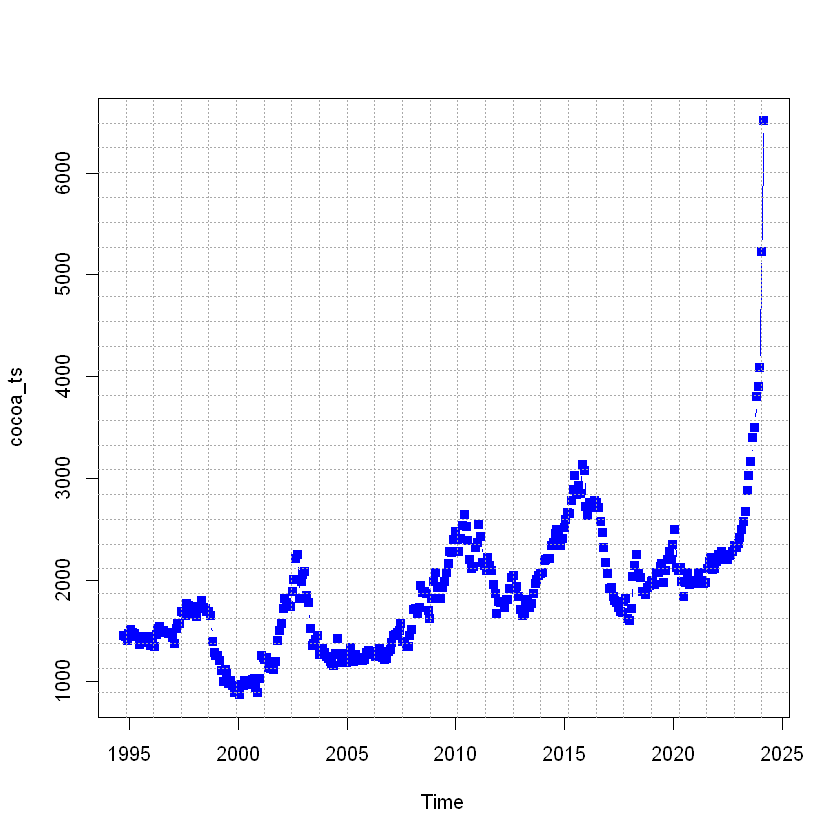

In [17]:
plot(cocoa_ts, pch=15, type='b', col='blue')
 grid(, col='darkgrey', nx=25)

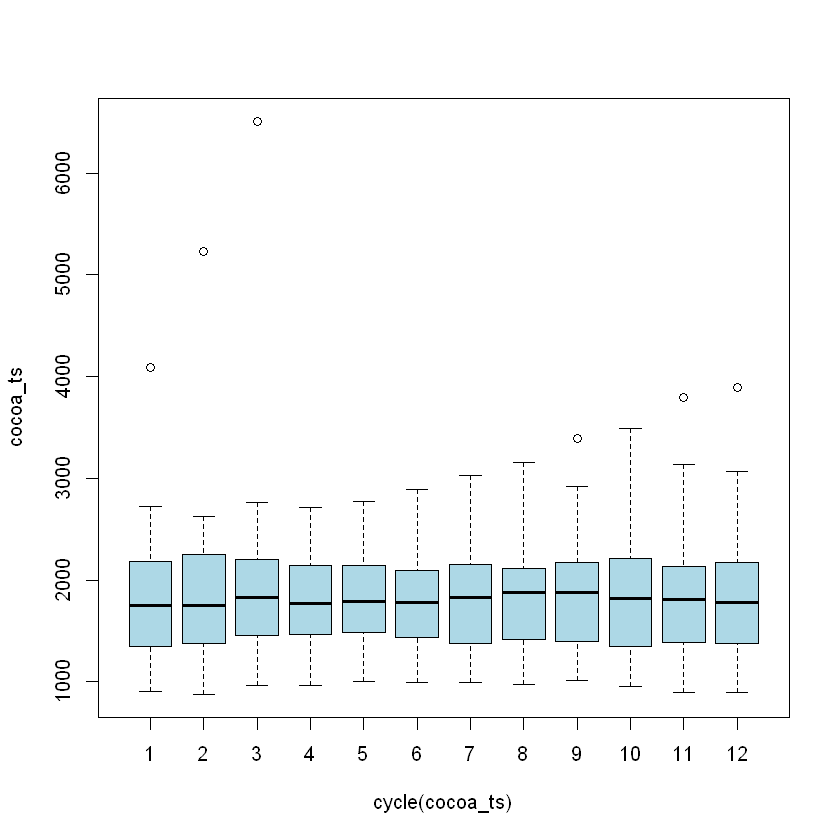

In [18]:
 boxplot(cocoa_ts~cycle(cocoa_ts), col='lightblue')

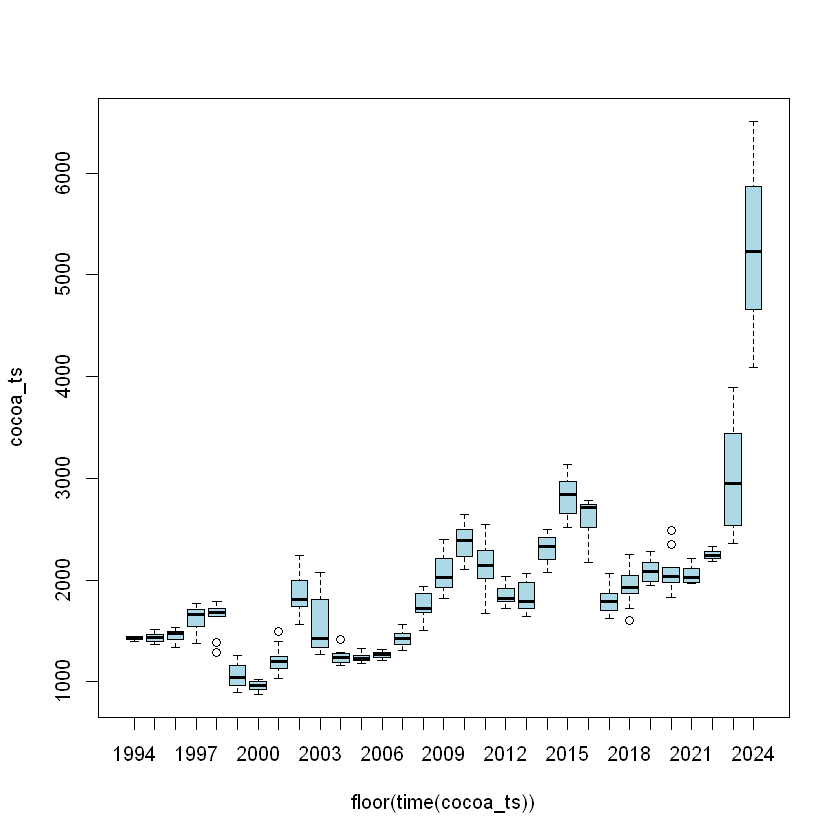

In [19]:
boxplot(cocoa_ts~floor(time(cocoa_ts)), col='lightblue')

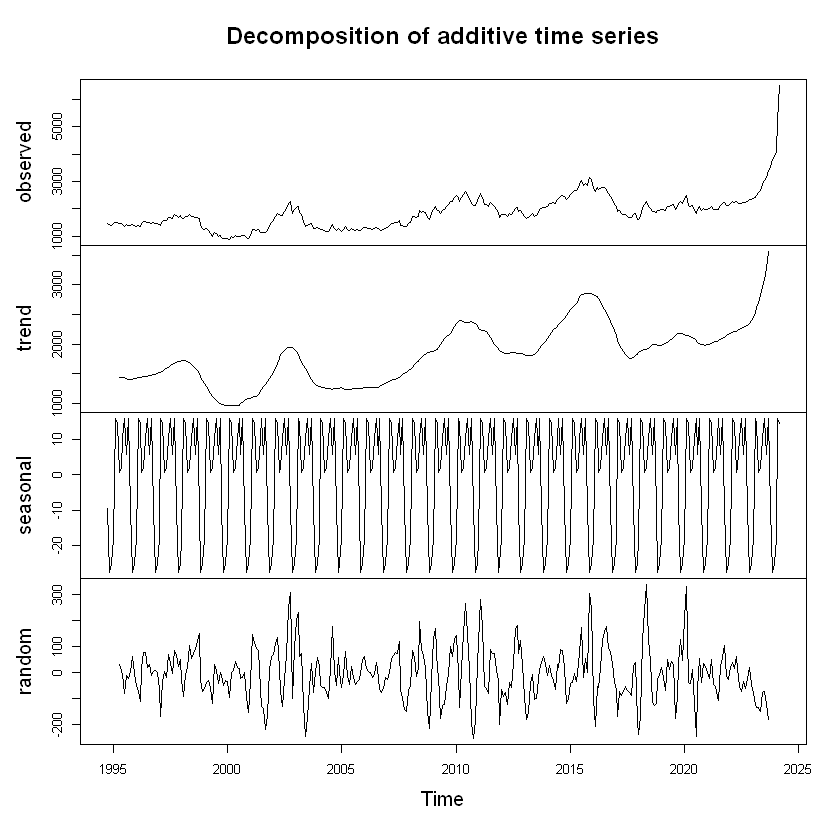

In [20]:
# Decomposition of the time series data in cocoa_ts into its components (observed, trend, seasonal, and random) 
plot(decompose(cocoa_ts))

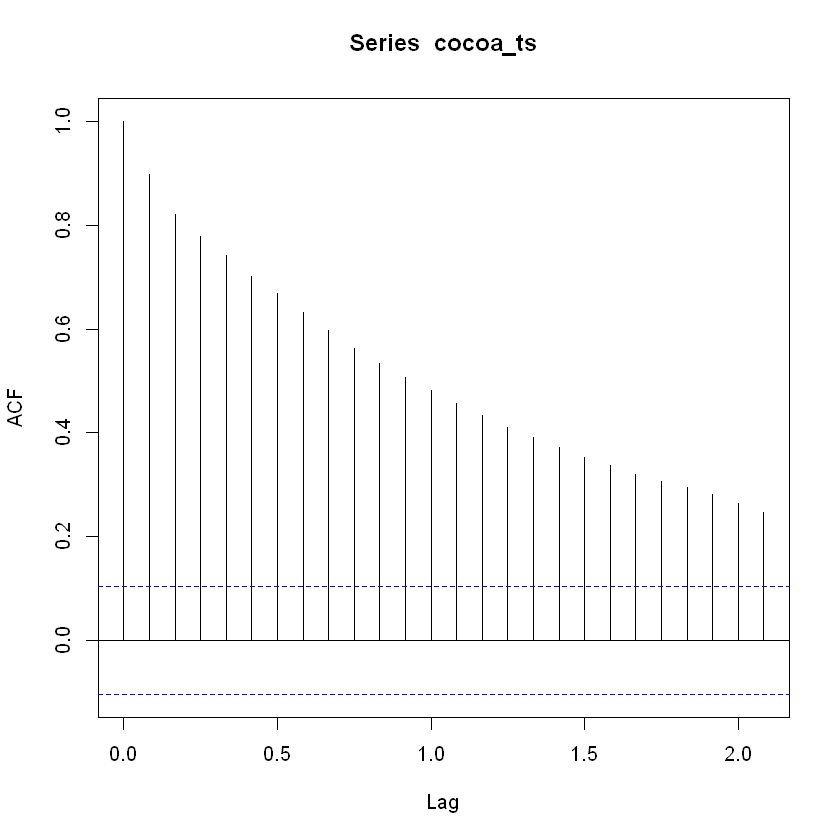

In [21]:
# Plotting the autocorrelation function for the time series data stored in cocoa_ts
acf(cocoa_ts)

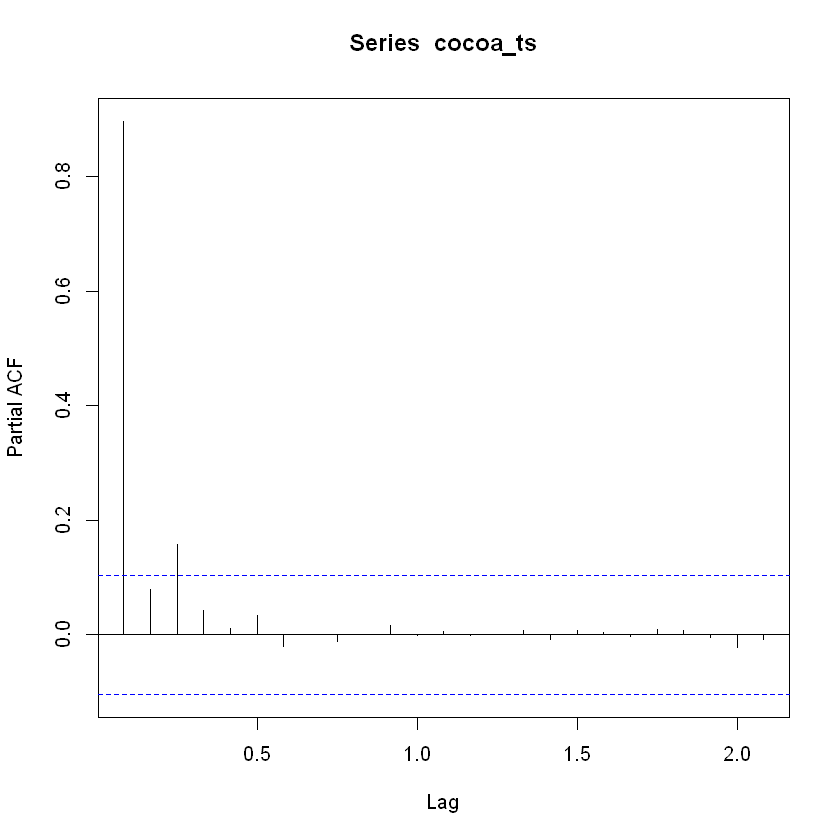

In [22]:
# Plotting the partial autocorrelation function for the time series data stored in cocoa_ts
pacf(cocoa_ts)

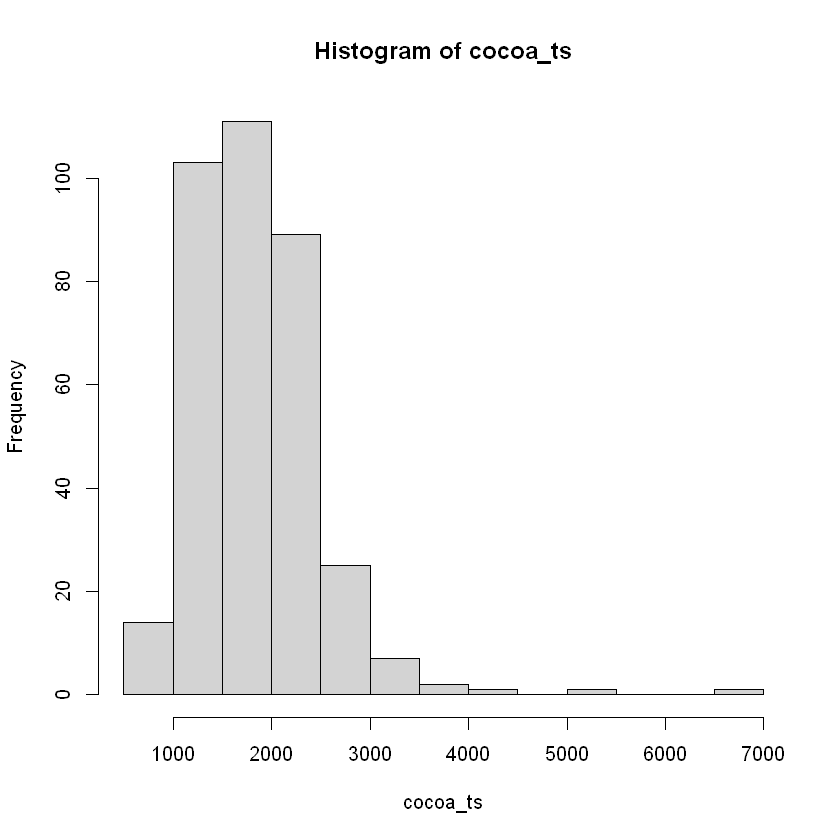

In [23]:
hist(cocoa_ts)


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




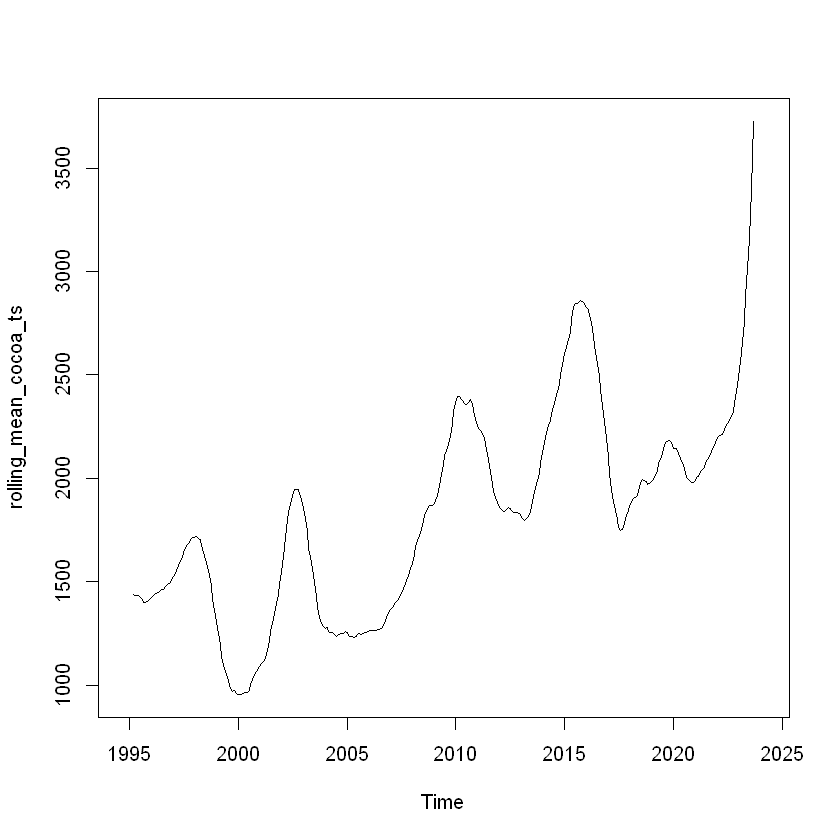

In [24]:
library(zoo)

# Calculate rolling mean with window size 12
rolling_mean_cocoa_ts <- rollmean(cocoa_ts, k = 12, align = "center", fill = NA)
plot(rolling_mean_cocoa_ts)

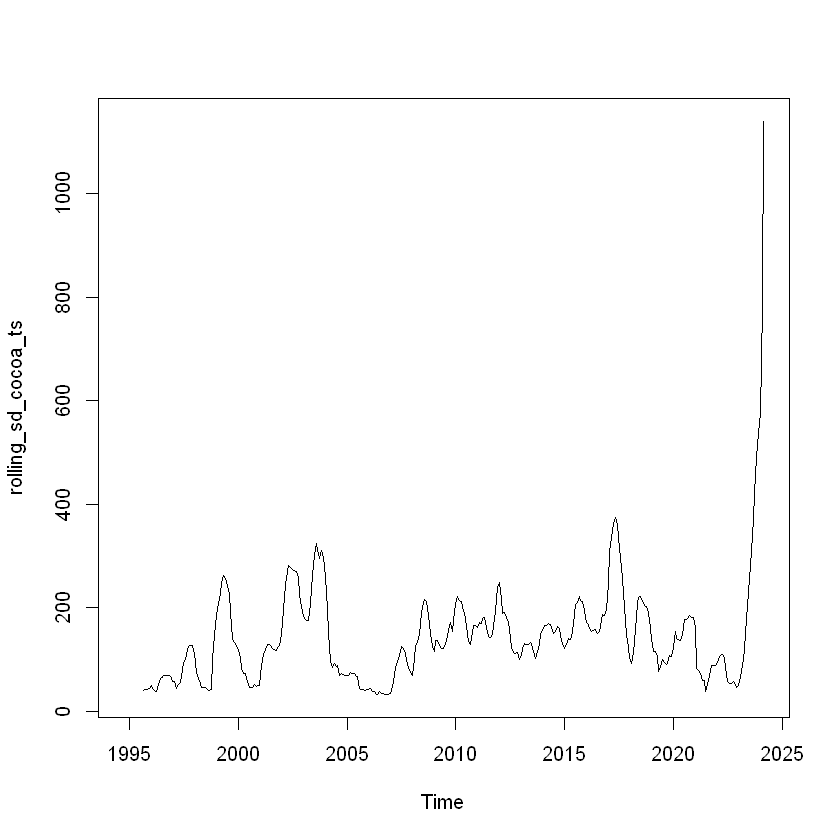

In [25]:
# Calculate rolling standard deviation with window size 12
rolling_sd_cocoa_ts <- rollapply(cocoa_ts, width = 12, FUN = sd, align = "right", fill = NA)
plot(rolling_sd_cocoa_ts)

In [26]:
# Splitting the data into training and testing
train <- window (cocoa_ts, start = c(1994,10), end = c(2023,09))
train

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1994,,,,,,,,,,1447.95,1437.05,1399.43
1995,1468.86,1510.55,1484.91,1469.26,1445.32,1437.14,1364.10,1413.00,1396.86,1394.50,1436.50,1378.84
1996,1349.50,1369.81,1338.62,1456.24,1524.09,1537.60,1495.70,1499.86,1476.14,1477.04,1469.33,1474.30
1997,1428.45,1372.70,1523.60,1571.05,1568.29,1688.38,1677.30,1652.14,1769.64,1741.43,1694.80,1737.29
1998,1668.10,1640.85,1719.18,1726.38,1794.35,1721.86,1712.17,1683.62,1687.32,1646.41,1388.52,1288.09
1999,1254.90,1257.40,1206.52,1108.00,998.75,1119.73,1074.77,980.86,1009.86,954.57,893.64,909.14
2000,906.38,874.14,966.70,962.95,1003.68,991.00,996.62,970.35,1013.57,1027.73,936.09,893.75
2001,1031.86,1257.00,1236.73,1212.60,1233.23,1140.10,1123.82,1147.17,1118.85,1197.35,1397.77,1497.00
2002,1567.59,1713.35,1815.35,1770.91,1749.78,1734.60,1881.78,2004.27,2206.19,2246.57,1811.29,1985.00
2003,2055.27,2076.40,1847.48,1774.86,1515.81,1352.76,1372.35,1410.62,1450.73,1265.57,1289.90,1324.14


In [27]:
test <- window (cocoa_ts, start = c(2023,10), end = c(2024,3))
test

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,,,,,,,,,,3495.03,3799.15,3897.04
2024,4087.54,5226.12,6510.16,,,,,,,,,


[1] 3

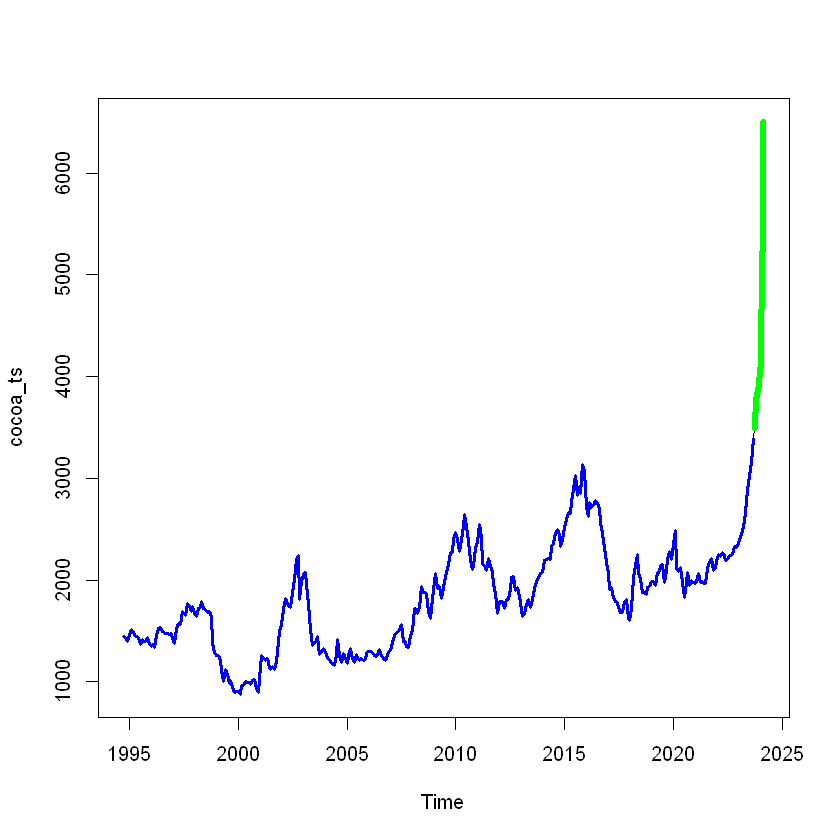

In [28]:
plot(cocoa_ts)
 x <- as.vector(time(train))
 y <- train
 3
lines(x, y, col='blue', lwd=3)
 x <- as.vector(time(test))
 y <- test
 lines(x, y, col='green', lwd=5)
 

### SIMPLE TIME SERIES MODELS

### Forecast Using the Mean Model

In [29]:
# Calculating the average value of the elements in the 'train' dataset
mean(train)

[1] 1807.319

In [30]:
fcast_mean <- meanf(train, h=length(test))
fcast_mean

         Point Forecast    Lo 80    Hi 80    Lo 95   Hi 95
Oct 2023       1807.319 1161.013 2453.625 817.3084 2797.33
Nov 2023       1807.319 1161.013 2453.625 817.3084 2797.33
Dec 2023       1807.319 1161.013 2453.625 817.3084 2797.33
Jan 2024       1807.319 1161.013 2453.625 817.3084 2797.33
Feb 2024       1807.319 1161.013 2453.625 817.3084 2797.33
Mar 2024       1807.319 1161.013 2453.625 817.3084 2797.33

In [31]:
# Evaluate the accuracy of the Mean Model forecasts against the test data
Mean_Model_accuracy<- round(accuracy(fcast_mean, test),3)
Mean_Model_accuracy

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.000,501.911,412.215,-8.433,25.431,1.389,0.966,NA
Test set,2695.188,2892.145,2695.188,57.964,57.964,9.080,0.384,4.085


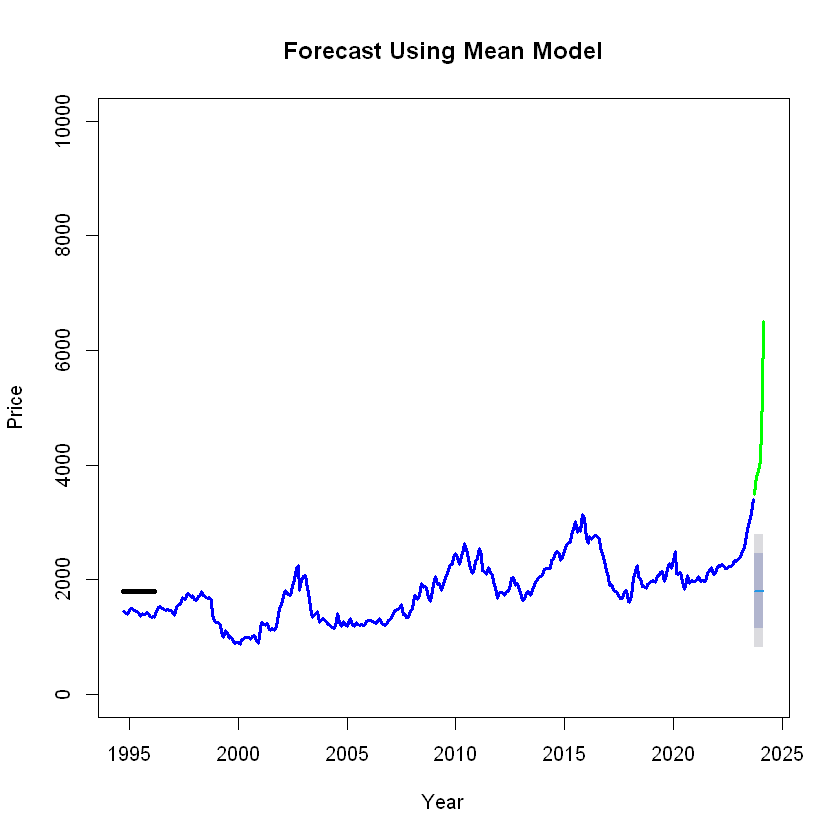

In [32]:
plot(fcast_mean, col = 'blue', lwd = 3, ylim = c(0, 10000),
     main = 'Forecast Using Mean Model', xlab = 'Year', ylab = 'Price')
x <- c(time(train)[1], time(train)[18])
y <- c(mean(train), mean(train))
lines(x, y, col='black', lwd=4)
x <- as.vector(time(test))
y <- test
lines(x, y, col='green', lwd=3)

### Forecast Using Naive Model

In [33]:
# Retrieve the last observation from the training data
train[length(train)]

[1] 3395.58

In [34]:
# Generate random walk forecasts for the length of the test data
forecast_rw <- rwf(train, h=length(test))
forecast_rw

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023        3395.58 3268.858 3522.302 3201.776 3589.384
Nov 2023        3395.58 3216.368 3574.792 3121.500 3669.660
Dec 2023        3395.58 3176.092 3615.068 3059.901 3731.259
Jan 2024        3395.58 3142.137 3649.023 3007.972 3783.188
Feb 2024        3395.58 3112.222 3678.938 2962.221 3828.939
Mar 2024        3395.58 3085.176 3705.984 2920.859 3870.301

In [35]:
naive_forecast<-naive(train,h=6)
naive_forecast

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023        3395.58 3268.858 3522.302 3201.776 3589.384
Nov 2023        3395.58 3216.368 3574.792 3121.500 3669.660
Dec 2023        3395.58 3176.092 3615.068 3059.901 3731.259
Jan 2024        3395.58 3142.137 3649.023 3007.972 3783.188
Feb 2024        3395.58 3112.222 3678.938 2962.221 3828.939
Mar 2024        3395.58 3085.176 3705.984 2920.859 3870.301

In [36]:
 # Evaluate the accuracy of the Naive Model forecasts against the test data
 naive_model_accuracy<- round(accuracy(naive_forecast, test), 2)
 naive_model_accuracy

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.61,98.88,73.89,0.10,4.12,0.25,0.17,NA
Test set,1106.93,1525.04,1106.93,21.02,21.02,3.73,0.38,2.04


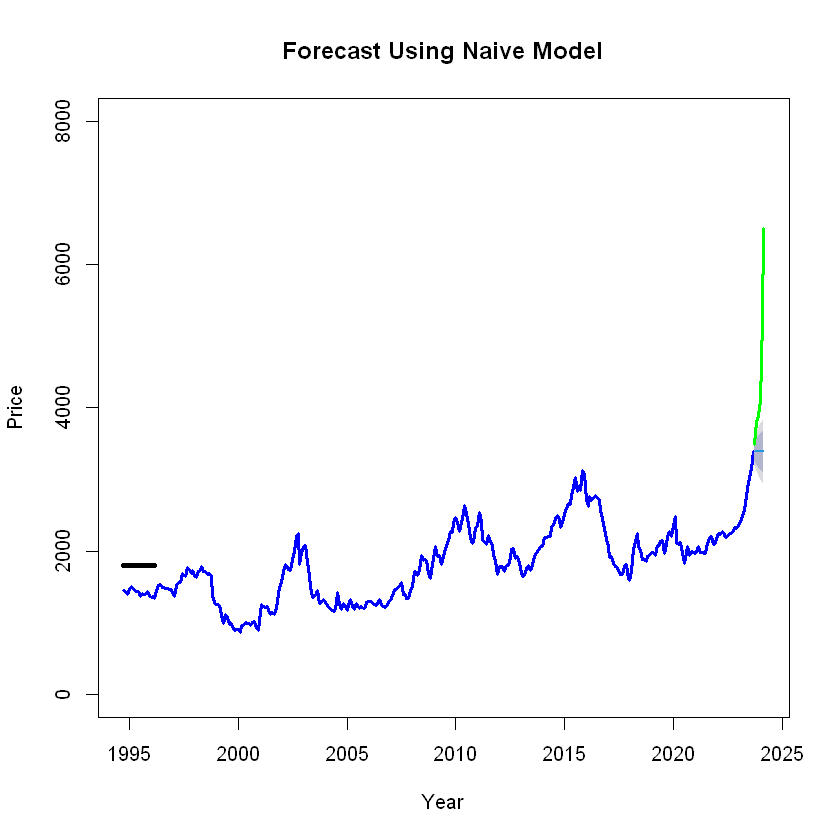

In [37]:
# Plot Seasonal Naive Model's forecast with training and test data overlay
plot(naive_forecast, col = 'blue', lwd = 3, ylim = c(0, 8000),
     main = 'Forecast Using Naive Model', xlab = 'Year', ylab = 'Price')
     
# Plot mean of training data as a baseline
x <- c(time(train)[1], time(train)[18])
y <- c(mean(train), mean(train))
lines(x, y, col='black', lwd=4)

# Overlay test data for comparison
x <- as.vector(time(test))
y <- test
lines(x, y, col='green', lwd=3)

### Forecast Using the Seasonal Naive Model

In [38]:
snaive_forecast <- snaive(train,h=length(test))
snaive_forecast

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023        2281.01 1783.444 2778.576 1520.049 3041.971
Nov 2023        2333.84 1836.274 2831.406 1572.879 3094.801
Dec 2023        2319.35 1821.784 2816.916 1558.389 3080.311
Jan 2024        2357.59 1860.024 2855.156 1596.629 3118.551
Feb 2024        2418.26 1920.694 2915.826 1657.299 3179.221
Mar 2024        2491.37 1993.804 2988.936 1730.409 3252.331

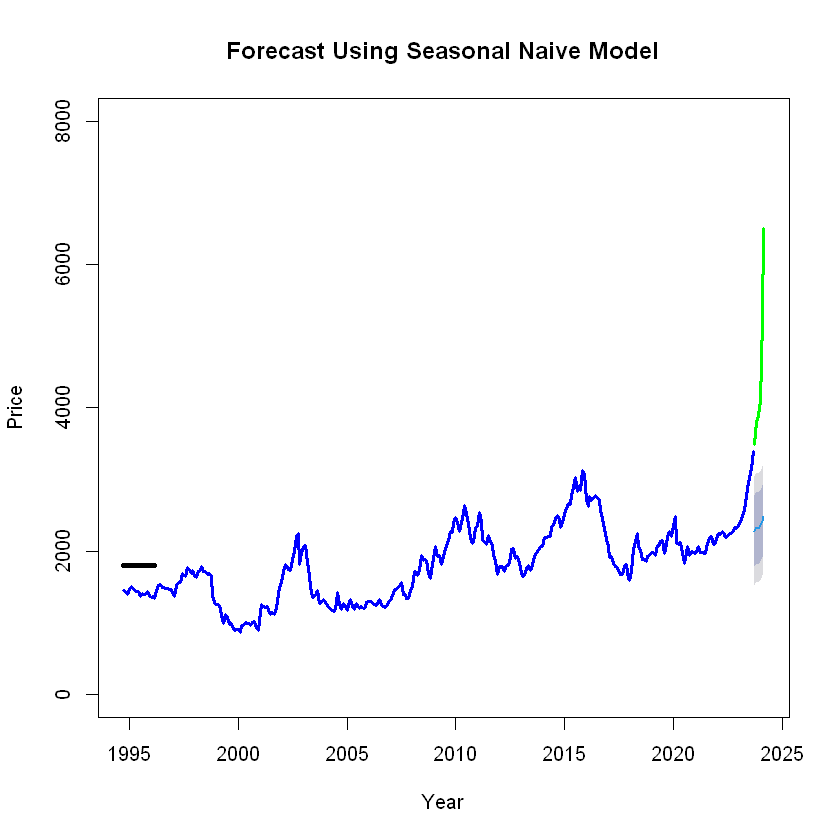

In [39]:
# Plot Seasonal Naive Model's forecast with training and test data overlay
plot(snaive_forecast, col = 'blue', lwd = 3, ylim = c(0, 8000),
     main = 'Forecast Using Seasonal Naive Model', xlab = 'Year', ylab = 'Price')
     
# Plot mean of training data as a baseline
x <- c(time(train)[1], time(train)[18])
y <- c(mean(train), mean(train))
lines(x, y, col='black', lwd=4)

# Overlay test data for comparison
x <- as.vector(time(test))
y <- test
lines(x, y, col='green', lwd=3)

In [40]:
# Evaluate the accuracy of the Seasonal Naive Model forecasts against the test data
snaive_accuracy<- accuracy(snaive_forecast, test)
snaive_accuracy

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,43.56342,388.2525,296.821,-0.2156996,16.86294,1.00000,0.9224303,NA
Test set,2135.60333,2350.0908,2135.603,45.2617240,45.26172,7.19492,0.3830578,3.29024


##### EVALUATION FOR SIMPLE TIME SERIES MODELS

In [41]:
STS_evaluation_results2 <- data.frame(
  Model = c("Mean", "Naive", "Seasonal Naive"),
  MAPE = c(Mean_Model_accuracy[2,5], naive_model_accuracy[2,5], snaive_accuracy[2,5]), 
  MAE = c(Mean_Model_accuracy[2,3], naive_model_accuracy[2,3], snaive_accuracy[2,3]),   
  RMSE = c(Mean_Model_accuracy[2,2], naive_model_accuracy[2,2], snaive_accuracy[2,2]),
  MPE = c(Mean_Model_accuracy[2,4], naive_model_accuracy[2,4], snaive_accuracy[2,4]) 
)
STS_evaluation_results2

Model,MAPE,MAE,RMSE,MPE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Mean,57.96400,2695.188,2892.145,57.96400
Naive,21.02000,1106.930,1525.040,21.02000
Seasonal Naive,45.26172,2135.603,2350.091,45.26172


## Exponential Smoothing

### Simple Exponential Smoothing

In [42]:
# Fit a Simple Exponential Smoothing model to the training data
ses_fit <- ses(train)

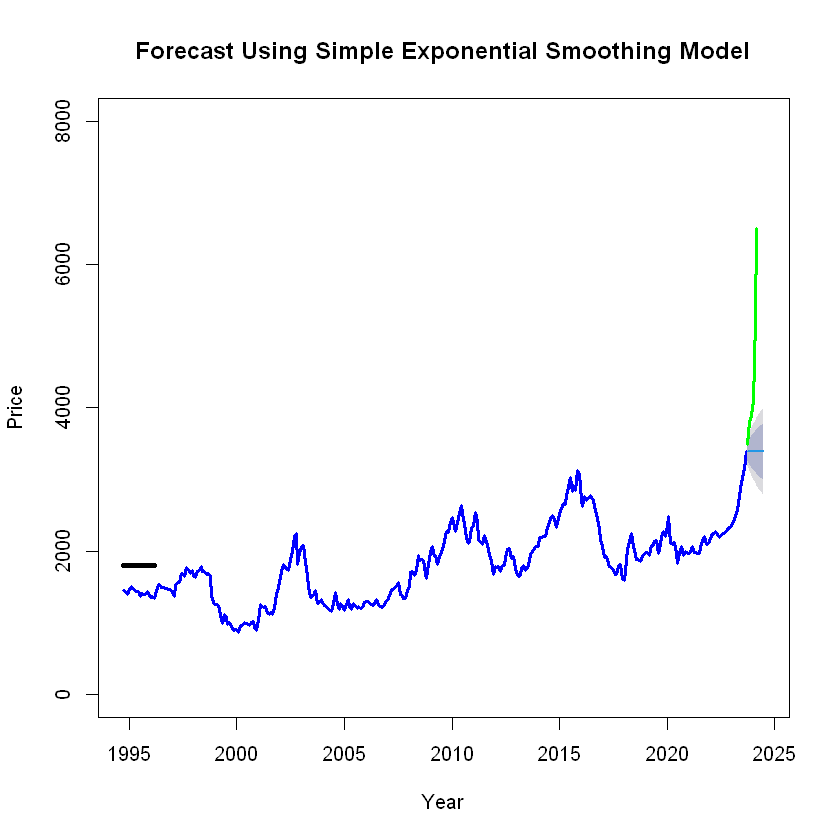

In [43]:

# Plot Simple Exponential Smoothing forecast with training and test data overlay
plot(ses_fit, col = 'blue', lwd = 3, ylim = c(0, 8000),
     main = 'Forecast Using Simple Exponential Smoothing Model', xlab = 'Year', ylab = 'Price')
     
# Plot mean of training data as a baseline
x <- c(time(train)[1], time(train)[18])
y <- c(mean(train), mean(train))
lines(x, y, col='black', lwd=4)

# Overlay test data for comparison
x <- as.vector(time(test))
y <- test
lines(x, y, col='green', lwd=3)

In [44]:
ses_fit$model

Simple exponential smoothing 

Call:
 ses(y = train) 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 1448.2592 

  sigma:  99.0259

     AIC     AICc      BIC 
5238.946 5239.016 5250.503 

In [45]:
ses_fit

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3395.556 3268.649 3522.463 3201.469 3589.643
Nov 2023       3395.556 3216.092 3575.021 3121.089 3670.023
Dec 2023       3395.556 3175.762 3615.351 3059.410 3731.703
Jan 2024       3395.556 3141.761 3649.351 3007.411 3783.702
Feb 2024       3395.556 3111.806 3679.306 2961.598 3829.514
Mar 2024       3395.556 3084.725 3706.387 2920.181 3870.931
Apr 2024       3395.556 3059.821 3731.291 2882.093 3909.019
May 2024       3395.556 3036.641 3754.472 2846.642 3944.470
Jun 2024       3395.556 3014.869 3776.243 2813.346 3977.766
Jul 2024       3395.556 2994.278 3796.835 2781.853 4009.259

In [46]:
# Evaluate the accuracy of the Simple Exponential Smoothing model forecasts against the test data
SES_accuracy <- accuracy(ses_fit, test)
SES_accuracy

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.59624,98.74098,73.68487,0.09705144,4.110025,0.2482468,0.1679183,NA
Test set,1106.95053,1525.05913,1106.95053,21.02270961,21.022710,3.7293540,0.3844148,2.039491


### Holt’s linear trend method 

In [47]:
# Fit the Holt's linear trend model to the training data predicting up to the length of the test data
holt_fit <- holt(train, h=length(test))
holt_fit

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3399.091 3271.764 3526.419 3204.361 3593.822
Nov 2023       3402.626 3222.356 3582.896 3126.927 3678.325
Dec 2023       3406.161 3185.122 3627.199 3068.112 3744.210
Jan 2024       3409.695 3154.167 3665.224 3018.898 3800.493
Feb 2024       3413.230 3127.209 3699.252 2975.798 3850.662
Mar 2024       3416.765 3103.080 3730.450 2937.026 3896.504

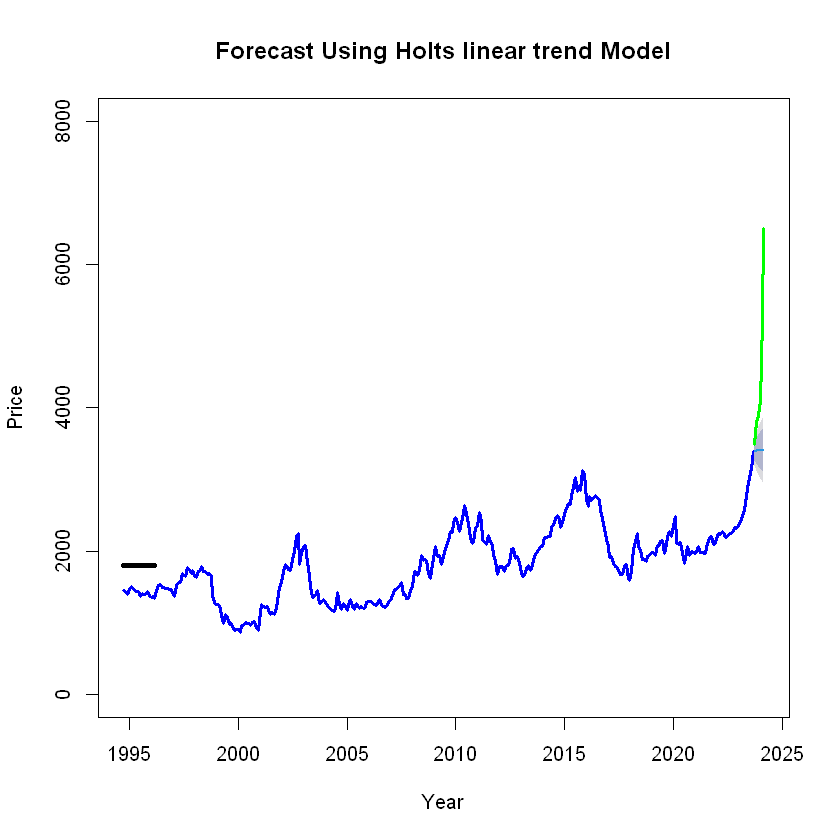

In [48]:
# Plot Holt's forecast with training and test data overlay
plot(holt_fit, col = 'blue', lwd = 3, ylim = c(0, 8000),
     main = 'Forecast Using Holts linear trend Model', xlab = 'Year', ylab = 'Price')
     
# Plot mean of training data as a baseline
x <- c(time(train)[1], time(train)[18])
y <- c(mean(train), mean(train))
lines(x, y, col='black', lwd=4)

# Overlay test data for comparison
x <- as.vector(time(test))
y <- test
lines(x, y, col='green', lwd=3)

In [49]:
# Access the model details from the Holt's linear trend fitting results
holt_fit$model

Holt's method 

Call:
 holt(y = train, h = length(test)) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.0023 

  Initial states:
    l = 1463.9748 
    b = -0.9774 

  sigma:  99.3541

     AIC     AICc      BIC 
5243.232 5243.407 5262.493 

In [50]:
# Evaluate the accuracy of the Holt model forecasts against the test data
Holt_model_accuracy <- accuracy(holt_fit, test)
Holt_model_accuracy

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.551667,98.78149,73.65275,0.1130049,4.107983,0.2481386,0.1668962,NA
Test set,1094.578570,1512.31242,1094.57857,20.7611704,20.761170,3.6876725,0.3836181,2.021022


### Holt Winter Method

In [51]:
# Fit the Holt's winter model to the training data predicting up to the length of the test data
HoltW_fit <- hw(train, h=length(test), seasonal='additive')
HoltW_fit

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3343.312 3215.088 3471.535 3147.211 3539.413
Nov 2023       3341.271 3159.870 3522.673 3063.842 3618.701
Dec 2023       3343.633 3121.374 3565.893 3003.718 3683.549
Jan 2024       3353.564 3096.817 3610.311 2960.903 3746.225
Feb 2024       3386.566 3099.396 3673.736 2947.378 3825.754
Mar 2024       3389.271 3074.563 3703.979 2907.967 3870.576

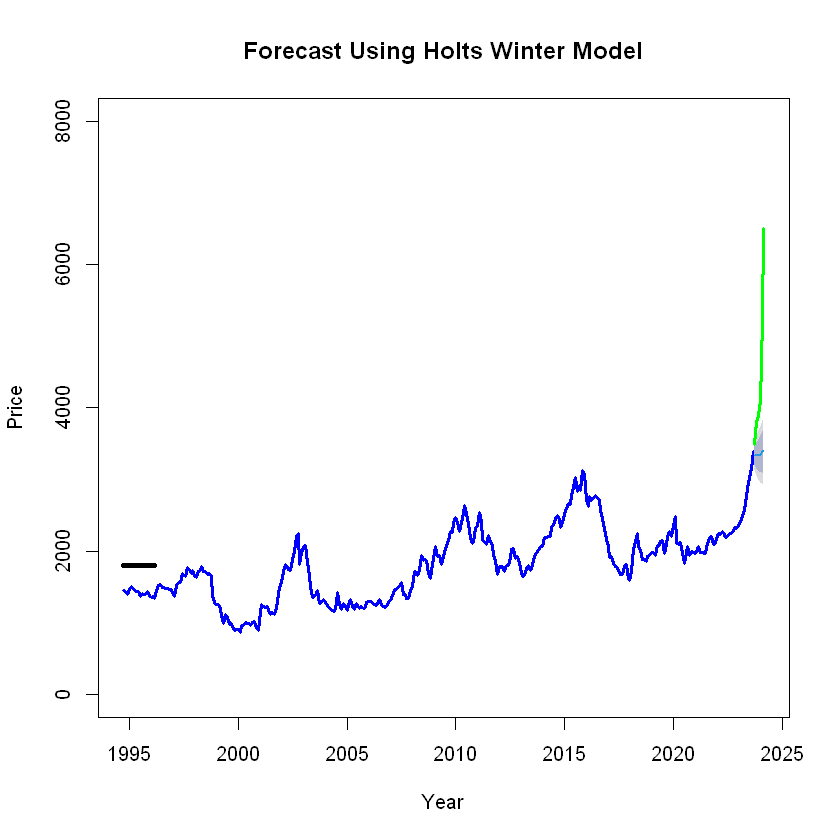

In [52]:
# Plot Holt's forecast with training and test data overlay
plot(HoltW_fit, col = 'blue', lwd = 3, ylim = c(0, 8000),
     main = 'Forecast Using Holts Winter Model', xlab = 'Year', ylab = 'Price')
     
# Plot mean of training data as a baseline
x <- c(time(train)[1], time(train)[18])
y <- c(mean(train), mean(train))
lines(x, y, col='black', lwd=4)

# Overlay test data for comparison
x <- as.vector(time(test))
y <- test
lines(x, y, col='green', lwd=3)

In [53]:
HoltW_fit$model

Holt-Winters' additive method 

Call:
 hw(y = train, h = length(test), seasonal = "additive") 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 8e-04 
    gamma = 1e-04 

  Initial states:
    l = 1568.2509 
    b = 0.2744 
    s = 28.9561 12.5902 15.7033 9.6922 5.6585 4.0371
           12.7921 11.7152 -19.6351 -27.9177 -28.592 -24.9999

  sigma:  100.0534

     AIC     AICc      BIC 
5259.757 5261.611 5325.244 

In [54]:
 HoltsWinters_accuracy<- accuracy(HoltW_fit, test)
 HoltsWinters_accuracy

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,4.740307,97.72622,73.22323,0.05664477,4.105115,0.2466916,0.1634445,NA
Test set,1142.903746,1538.48171,1142.90375,21.94803310,21.948033,3.8504817,0.3797743,2.064053


### ETS AAA model

In [55]:
# Fit an ETS model with additive error, trend, and seasonality to the training data
ets.aaa <- ets(train, model='AAA')

# Forecast future values based on the ETS model for the length of the test data
ets.aaa_forecast <- forecast(ets.aaa, h=length(test))
ets.aaa_forecast

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3379.292 3251.819 3506.765 3184.339 3574.245
Nov 2023       3404.418 3217.651 3591.185 3118.782 3690.054
Dec 2023       3431.857 3196.181 3667.533 3071.421 3792.292
Jan 2024       3458.029 3178.918 3737.139 3031.166 3884.891
Feb 2024       3506.576 3187.720 3825.431 3018.929 3994.223
Mar 2024       3519.217 3163.420 3875.014 2975.072 4063.361

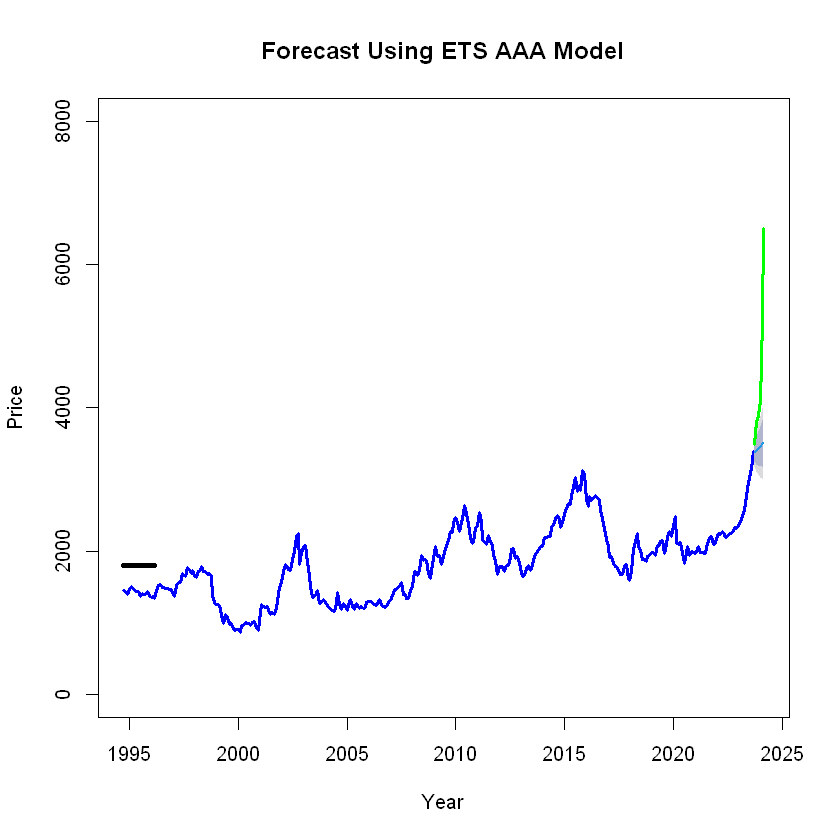

In [56]:
# Plot ETS AAA's forecast with training and test data overlay
plot(ets.aaa_forecast, col = 'blue', lwd = 3, ylim = c(0, 8000),
     main = 'Forecast Using ETS AAA Model', xlab = 'Year', ylab = 'Price')

# Plot mean of training data as a baseline
x <- c(time(train)[1], time(train)[18])
y <- c(mean(train), mean(train))
lines(x, y, col='black', lwd=4)

# Overlay test data for comparison
x <- as.vector(time(test))
y <- test
lines(x, y, col='green', lwd=3)

In [57]:
# Retrieve the model type used in the ETS forecast
ets.aaa_forecast$model

ETS(A,Ad,A) 

Call:
 ets(y = train, model = "AAA") 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.0887 
    gamma = 1e-04 
    phi   = 0.8 

  Initial states:
    l = 1532.3931 
    b = 0.3869 
    s = 30.0483 11.7193 16.5113 10.9946 4.5216 2.5287
           12.6983 12.5723 -20.3225 -26.9103 -29.8524 -24.5093

  sigma:  99.4677

     AIC     AICc      BIC 
5256.621 5258.700 5325.961 

In [58]:
# Evaluate the accuracy of the ets.aaa model forecasts against the test data
ETS_AAA_accuracy <- accuracy(ets.aaa_forecast, test)
ETS_AAA_accuracy

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,4.290217,97.00777,71.86331,0.0843305,4.038597,0.242110,0.09701786,NA
Test set,1052.608763,1453.98667,1052.60876,19.9807801,19.980780,3.546275,0.37470109,1.93852


### ETS MMM model

In [59]:
# Fit an ETS model with multiplicative error, trend, and seasonality to the training data
ets.mmm <- ets(train, model='MMM')
# Forecast future values using the ETS MMM model for the length of the test data
ets.mmm_forecast <- forecast(ets.mmm, h=length(test))
ets.mmm_forecast

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3337.770 3102.210 3575.968 2986.076 3694.157
Nov 2023       3330.213 2997.639 3668.054 2831.829 3865.409
Dec 2023       3353.219 2948.662 3782.751 2736.688 4020.811
Jan 2024       3418.896 2938.243 3918.329 2706.461 4238.776
Feb 2024       3534.704 2979.944 4138.035 2713.000 4510.460
Mar 2024       3587.671 2976.131 4254.527 2676.224 4664.798

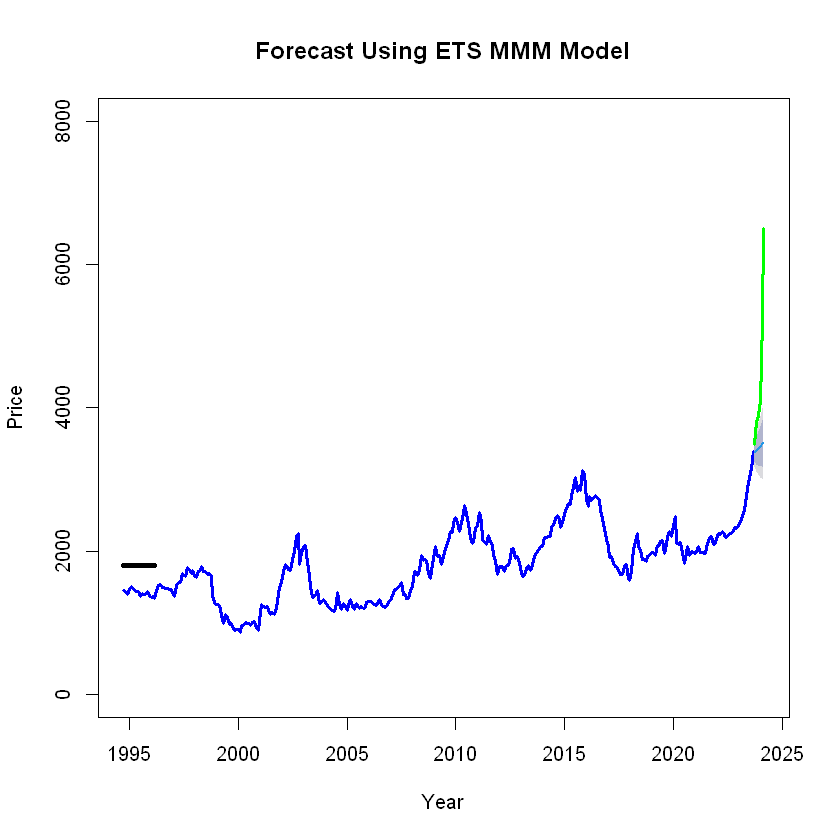

In [60]:
# Plot ETS MMM's forecast with training and test data overlay
plot(ets.aaa_forecast, col = 'blue', lwd = 3, ylim = c(0, 8000),
     main = 'Forecast Using ETS MMM Model', xlab = 'Year', ylab = 'Price')

# Plot mean of training data as a baseline
x <- c(time(train)[1], time(train)[18])
y <- c(mean(train), mean(train))
lines(x, y, col='black', lwd=4)

# Overlay test data for comparison
x <- as.vector(time(test))
y <- test
lines(x, y, col='green', lwd=3)

In [61]:
# Retrieve the model type used in the ETS MMM forecast
ets.mmm

ETS(M,Md,M) 

Call:
 ets(y = train, model = "MMM") 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.0091 
    gamma = 1e-04 
    phi   = 0.98 

  Initial states:
    l = 1437.7536 
    b = 1.006 
    s = 0.9948 0.9992 1.0159 1.0184 1.0151 1.0176
           1.0263 1.015 0.9856 0.9705 0.9677 0.9739

  sigma:  0.0551

     AIC     AICc      BIC 
5229.548 5231.627 5298.888 

In [62]:
# Evaluate the accuracy of the ETS MMM model forecasts against the test data
ETS_MMM_accuracy <- accuracy(ets.mmm_forecast, test)
ETS_MMM_accuracy

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.828579,99.10564,73.054,-0.0364675,4.094241,0.2461214,0.1851739,NA
Test set,1075.427977,1436.96959,1075.428,20.7352411,20.735241,3.6231535,0.3638002,1.927248


##### Evaluation of Exponential Smoothing

In [63]:
ETS_evaluation_results2 <- data.frame(
  Model = c("SES_accuracy", "Holt_model_accuracy", "HoltsWinters_accuracy", "ETS_AAA_accuracy", "ETS_MMM_accuracy"),
  MAPE = c(SES_accuracy[2,5], Holt_model_accuracy[2,5], HoltsWinters_accuracy[2,5], ETS_AAA_accuracy[2,5], ETS_MMM_accuracy[2,5]),
  MAE = c(SES_accuracy[2,3], Holt_model_accuracy[2,3], HoltsWinters_accuracy[2,3], ETS_AAA_accuracy[2,3], ETS_MMM_accuracy[2,3]),
  RMSE = c(SES_accuracy[2,2], Holt_model_accuracy[2,2], HoltsWinters_accuracy[2,2], ETS_AAA_accuracy[2,2], ETS_MMM_accuracy[2,2]),
  MPE = c(SES_accuracy[2,4], Holt_model_accuracy[2,4], HoltsWinters_accuracy[2,4], ETS_AAA_accuracy[2,4], ETS_MMM_accuracy[2,4])
)
ETS_evaluation_results2

Model,MAPE,MAE,RMSE,MPE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
SES_accuracy,21.02271,1106.951,1525.059,21.02271
Holt_model_accuracy,20.76117,1094.579,1512.312,20.76117
HoltsWinters_accuracy,21.94803,1142.904,1538.482,21.94803
ETS_AAA_accuracy,19.98078,1052.609,1453.987,19.98078
ETS_MMM_accuracy,20.73524,1075.428,1436.970,20.73524


## ARIMA

In [64]:
# Perform Augmented Dickey-Fuller test to check stationarity of the train dataset
adf.test(train)


	Augmented Dickey-Fuller Test

data:  train
Dickey-Fuller = -3.0694, Lag order = 7, p-value = 0.1256
alternative hypothesis: stationary


In [65]:
# Determine the number of differences needed for stationarity
ndiffs(train)

[1] 1

In [66]:
# Calculate the first difference of the train dataset
FirstDifference <- train %>% diff()


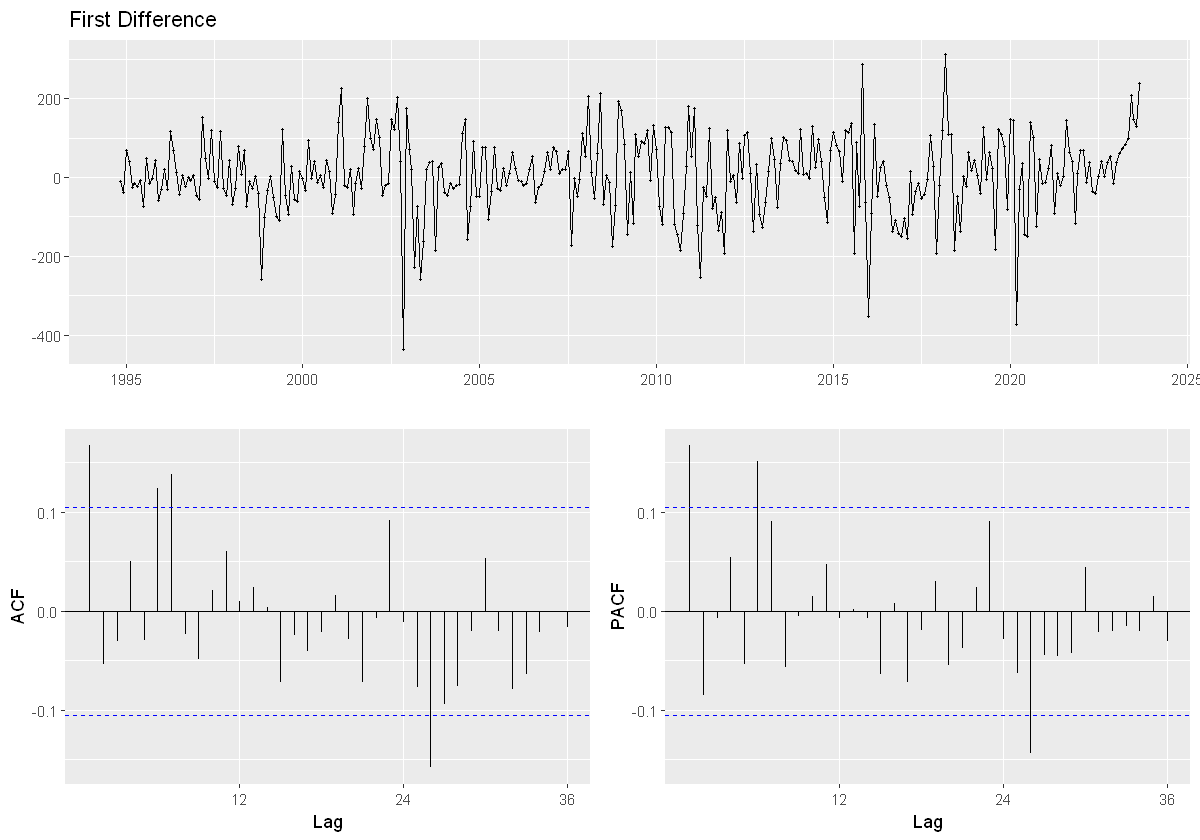

In [67]:
# Plot the first difference to analyze stationarity
options(repr.plot.width=10) # Set plot width
ggtsdisplay (FirstDifference,main="First Difference")

### ARIMA(3,1,0)

In [68]:
# Fit an ARIMA model with parameters (3,1,0) to the training data
fit310 <- Arima(train, order=c(3,1,0))
summary (fit310)

Series: train 
ARIMA(3,1,0) 

Coefficients:
         ar1      ar2      ar3
      0.1857  -0.0821  -0.0041
s.e.  0.0540   0.0547   0.0542

sigma^2 = 9507:  log likelihood = -2080.11
AIC=4168.23   AICc=4168.35   BIC=4183.63

Training set error measures:
                   ME    RMSE      MAE        MPE     MAPE      MASE
Training set 5.078602 96.9434 71.93771 0.09569707 4.018656 0.2423606
                     ACF1
Training set -0.001640878

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,1089.452,1515.001,1089.452,20.59545,20.59545,0.3845361,2.024147


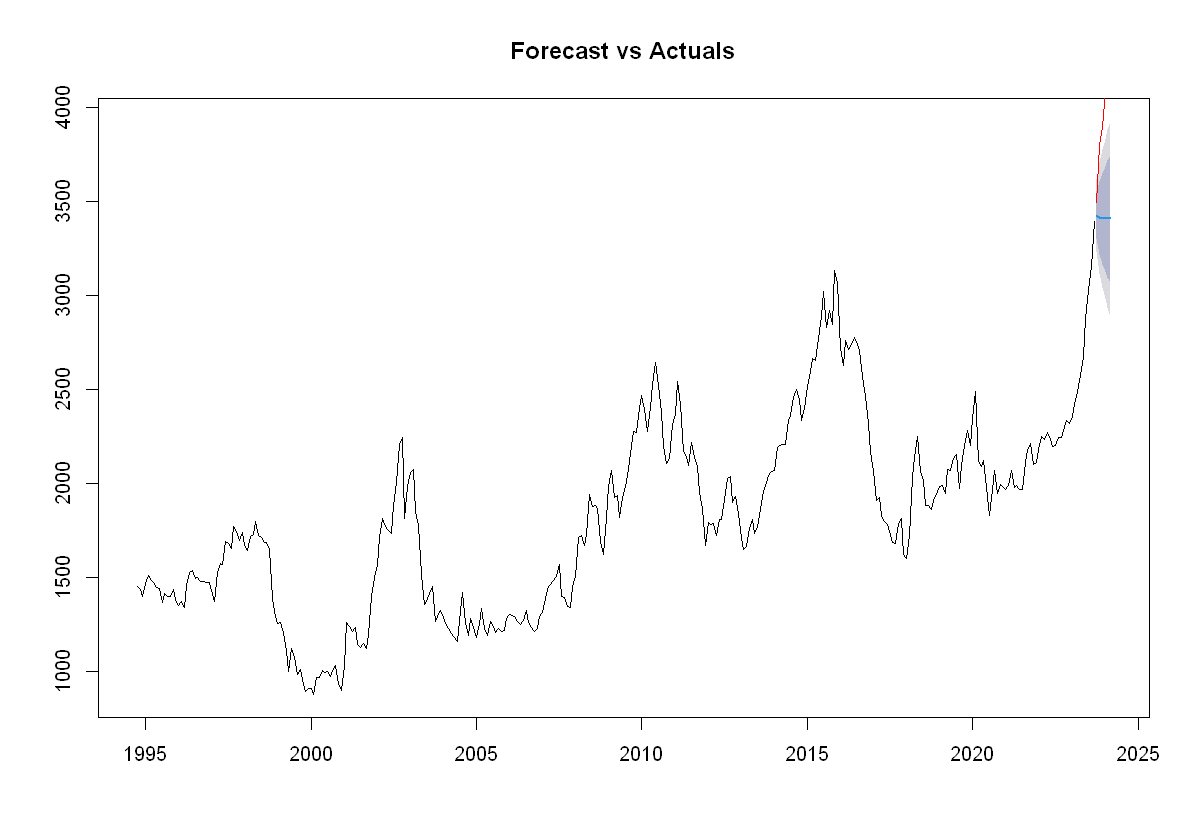

In [89]:
# Testing the  ARIMA model
forecasts <- forecast(fit310, h=length(test))

# Plotting forecasts against actual test data
plot(forecasts, main="Forecast vs Actuals")
lines(test, col = 'red')  # Add actual data on the plot for comparison


# Accuracy metrics on test data
accuracy(forecasts$mean, test)

### ARIMA(2,1,0)

In [69]:
# Fit an ARIMA model with parameters (2,1,0) to the training data
fit210 <- Arima(train, order=c(2,1,0))
summary (fit210)

Series: train 
ARIMA(2,1,0) 

Coefficients:
         ar1      ar2
      0.1861  -0.0828
s.e.  0.0538   0.0539

sigma^2 = 9480:  log likelihood = -2080.12
AIC=4166.24   AICc=4166.31   BIC=4177.78

Training set error measures:
                   ME    RMSE      MAE        MPE     MAPE      MASE
Training set 5.063148 96.9442 71.93715 0.09558824 4.018062 0.2423587
                     ACF1
Training set -0.002192893

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,1087.689,1513.457,1087.689,20.55651,20.55651,0.3844048,2.021797


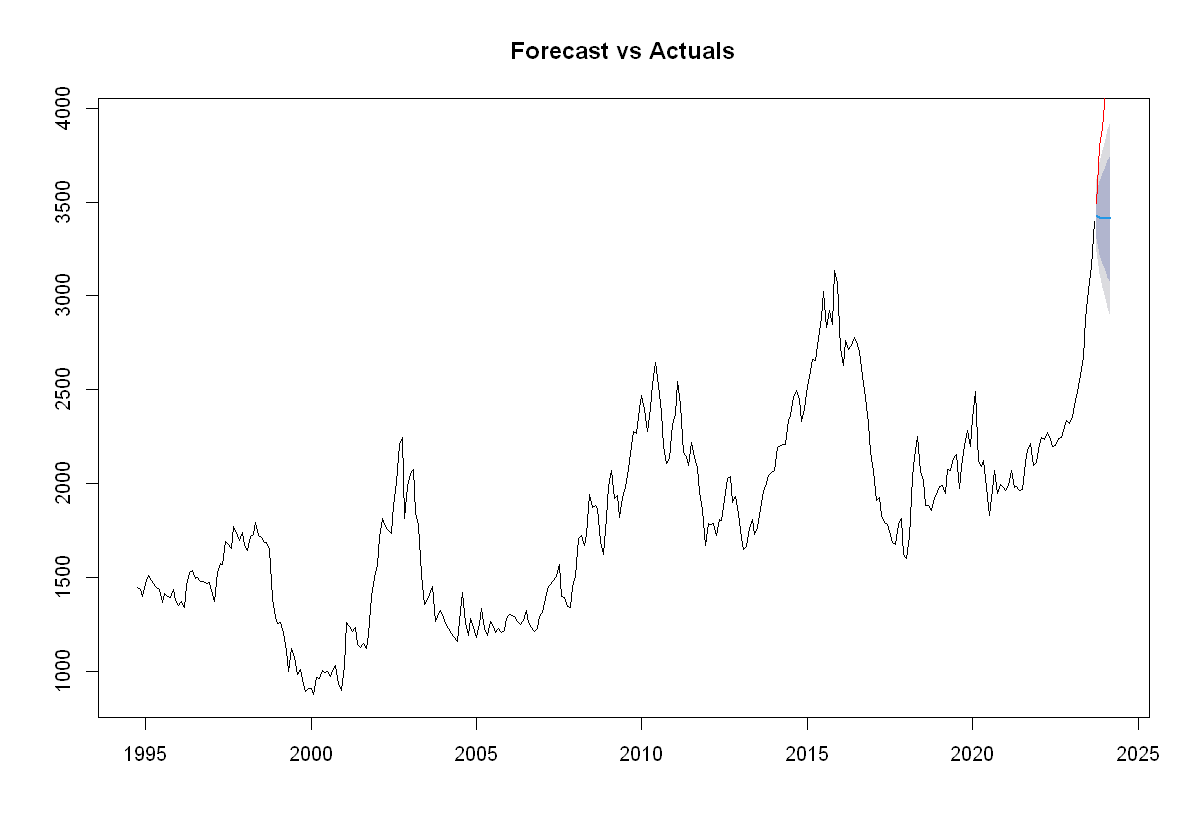

In [88]:
# Testing the  ARIMA model
forecasts <- forecast(fit210, h=length(test))

# Plotting forecasts against actual test data
plot(forecasts, main="Forecast vs Actuals")
lines(test, col = 'red')  # Add actual data on the plot for comparison


# Accuracy metrics on test data
accuracy(forecasts$mean, test)


### ARIMA(0,1,1)

In [70]:
# Fit an ARIMA model with parameters (0,1,1) to the training data
fit011 <- Arima(train, order=c(0,1,1))
summary (fit011)

Series: train 
ARIMA(0,1,1) 

Coefficients:
         ma1
      0.1934
s.e.  0.0540

sigma^2 = 9478:  log likelihood = -2080.58
AIC=4165.16   AICc=4165.2   BIC=4172.86

Training set error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE
Training set 4.795818 97.07466 71.86722 0.09289758 4.021192 0.2421231
                     ACF1
Training set -0.007993903

### AUTO FIT

In [71]:
# Automatically fit an optimal ARIMA model to the training data
Auto_arima <- auto.arima(train)
Auto_arima

Series: train 
ARIMA(0,1,1) 

Coefficients:
         ma1
      0.1934
s.e.  0.0540

sigma^2 = 9478:  log likelihood = -2080.58
AIC=4165.16   AICc=4165.2   BIC=4172.86


	Ljung-Box test

data:  Residuals
Q* = 25.319, df = 24, p-value = 0.3886

Model df: 0.   Total lags used: 24



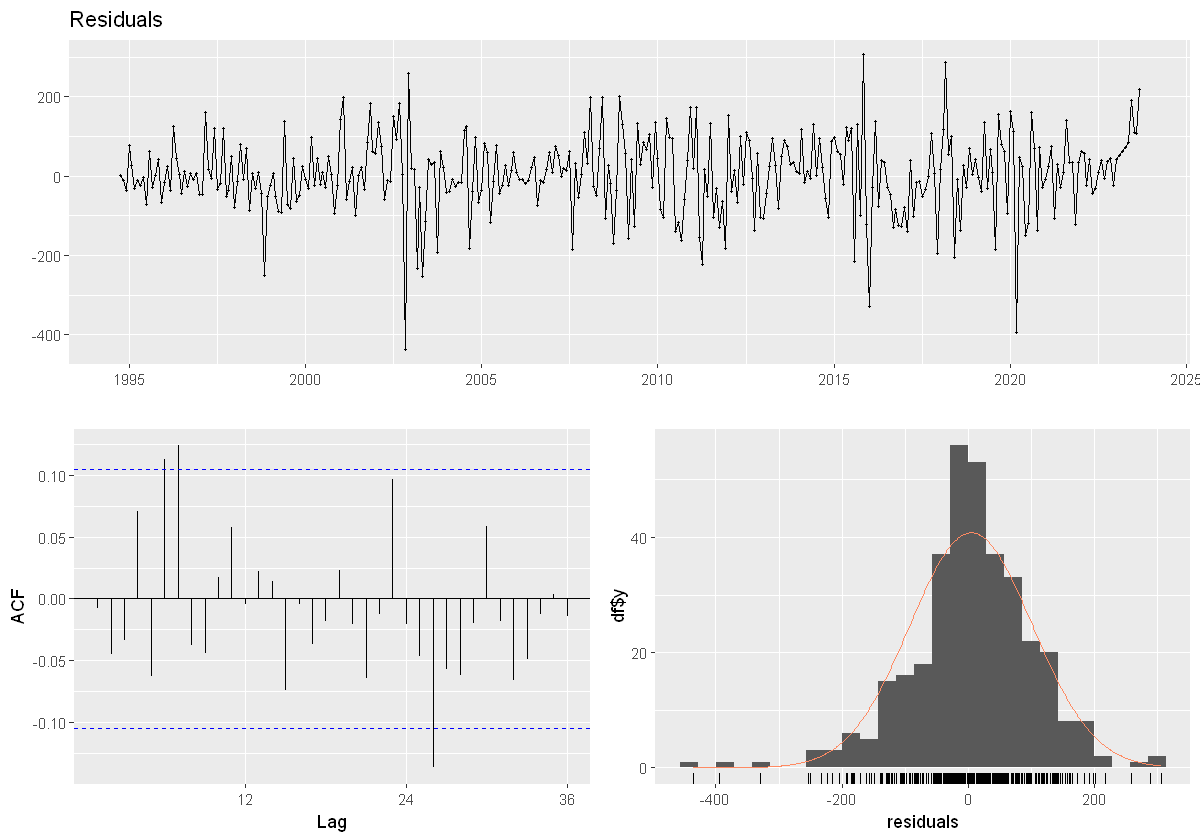

In [72]:
# Analyze the residuals of the fitted ARIMA model to check model adequacy
checkresiduals(fit011$residuals)

In [83]:
# Generate forecasts from the fitted ARIMA model for the length of the test dataset
predictions011 <- forecast::forecast(fit011,h=length(test))
predictions011


         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3437.705 3312.940 3562.470 3246.893 3628.517
Nov 2023       3437.705 3243.450 3631.959 3140.618 3734.791
Dec 2023       3437.705 3192.954 3682.456 3063.390 3812.019
Jan 2024       3437.705 3151.224 3724.186 2999.570 3875.840
Feb 2024       3437.705 3114.843 3760.567 2943.930 3931.480
Mar 2024       3437.705 3082.165 3793.244 2893.954 3981.455

In [74]:
# Evaluate and round the accuracy metrics of the ARIMA model to three decimal places
ARIMA_accuracy <- round(accuracy (fit011),3)
ARIMA_accuracy

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,4.796,97.075,71.867,0.093,4.021,0.242,-0.008


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,1064.802,1494.747,1064.802,20.04238,20.04238,0.3844148,1.993014


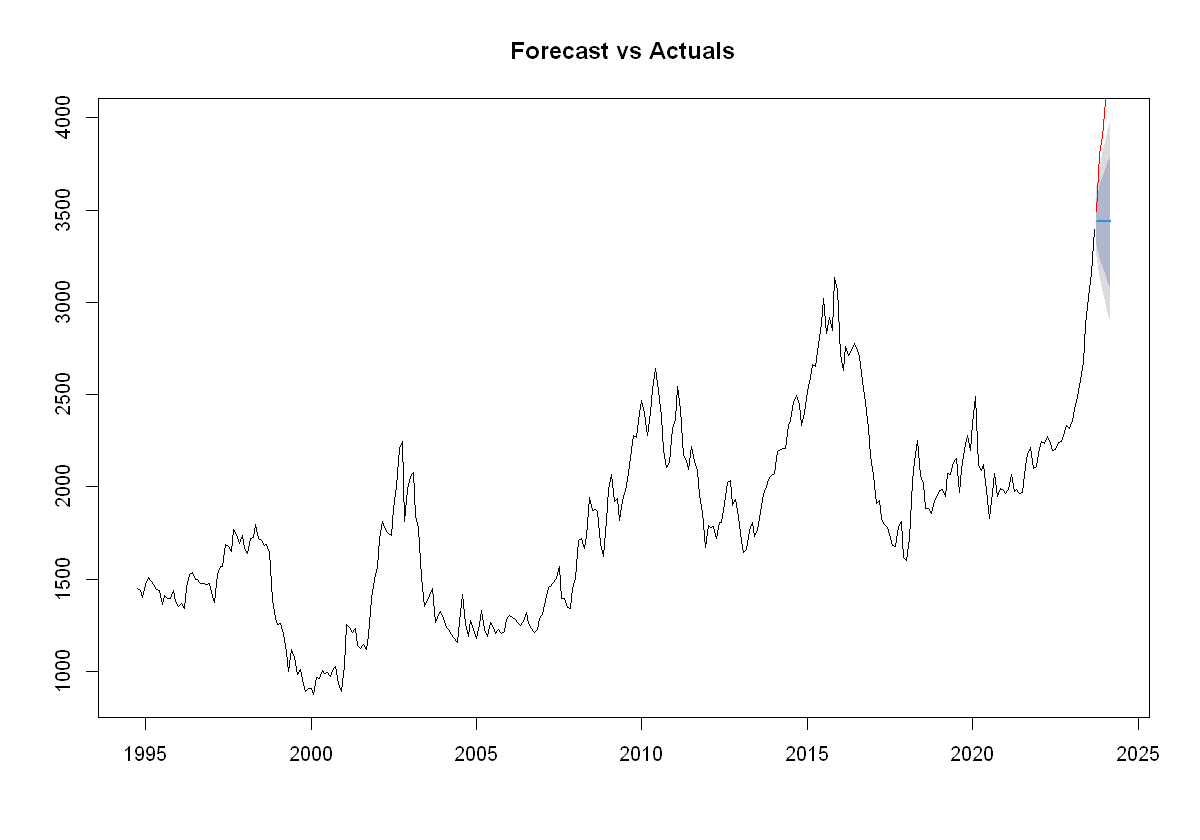

In [93]:
# Testing the  ARIMA model
forecasts <- forecast(fit011, h=length(test))

# Plotting forecasts against actual test data
plot(forecasts, main="Forecast vs Actuals")
lines(test, col = 'red')  # Add actual data on the plot for comparison

# Accuracy metrics on test data
Arima_accuracy <- accuracy(forecasts$mean, test)
Arima_accuracy

## SARIMA

In [75]:
# Fit a seasonal ARIMA model to the training dataset
library(forecast)
auto.arima(train, seasonal = TRUE)

Series: train 
ARIMA(0,1,1) 

Coefficients:
         ma1
      0.1934
s.e.  0.0540

sigma^2 = 9478:  log likelihood = -2080.58
AIC=4165.16   AICc=4165.2   BIC=4172.86

In [76]:
# Evaluate and round the accuracy metrics of the SARIMA model to three decimal places
SARIMA_accuracy<- round(accuracy (fit011),3)
SARIMA_accuracy

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,4.796,97.075,71.867,0.093,4.021,0.242,-0.008


In [85]:
# Generate forecasts from the fitted SARIMA model for the length of the test dataset
predictions011 <- forecast::forecast(fit011,h=length(test))
predictions011

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       3437.705 3312.940 3562.470 3246.893 3628.517
Nov 2023       3437.705 3243.450 3631.959 3140.618 3734.791
Dec 2023       3437.705 3192.954 3682.456 3063.390 3812.019
Jan 2024       3437.705 3151.224 3724.186 2999.570 3875.840
Feb 2024       3437.705 3114.843 3760.567 2943.930 3931.480
Mar 2024       3437.705 3082.165 3793.244 2893.954 3981.455

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,1064.802,1494.747,1064.802,20.04238,20.04238,0.3844148,1.993014


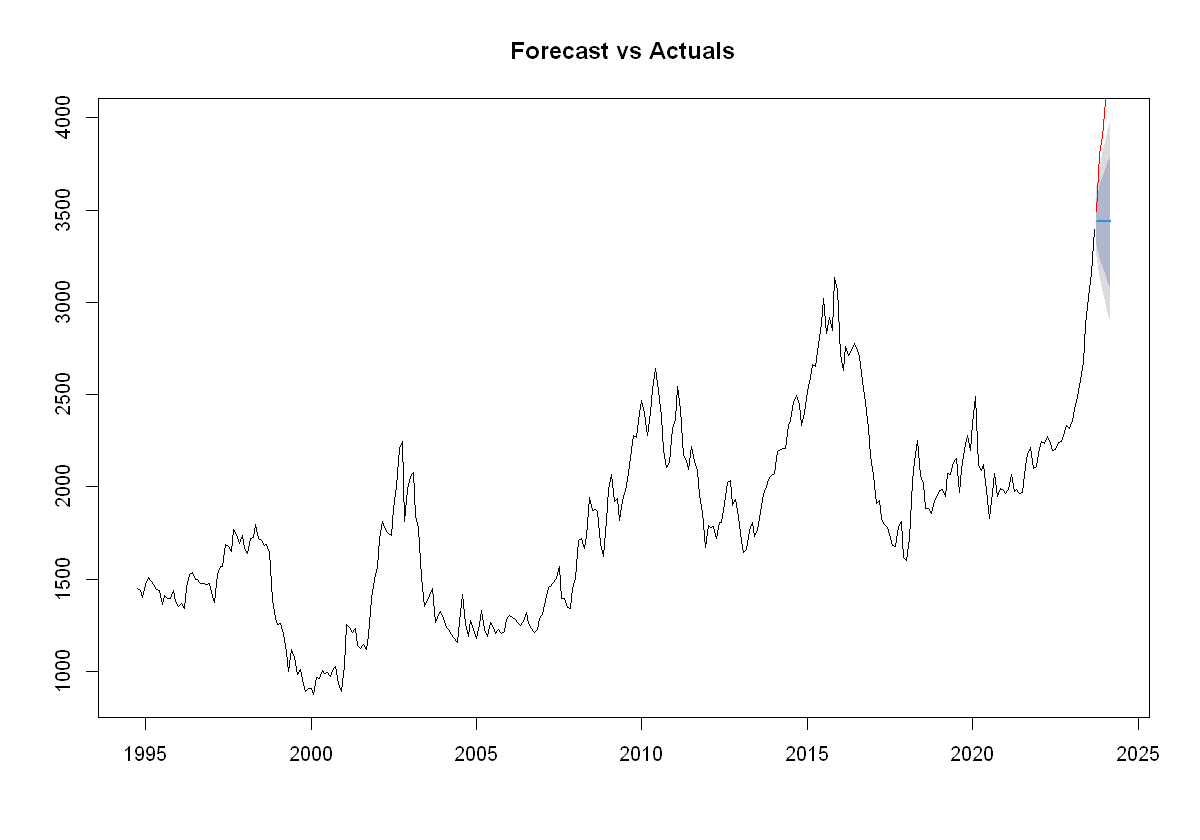

In [92]:
# Testing the  SARIMA model
forecasts <- forecast(fit011, h=length(test))

# Plotting forecasts against actual test data
plot(forecasts, main="Forecast vs Actuals")
lines(test, col = 'red')  # Add actual data on the plot for comparison

# Accuracy metrics on test data
Sarima_accuracy <- accuracy(forecasts$mean, test)
Sarima_accuracy

## EVALUATION

In [87]:
# Evaluation for all models used
STS_evaluation_results2
ETS_evaluation_results2
Arima_accuracy
Sarima_accuracy

Model,MAPE,MAE,RMSE,MPE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Mean,57.96400,2695.188,2892.145,57.96400
Naive,21.02000,1106.930,1525.040,21.02000
Seasonal Naive,45.26172,2135.603,2350.091,45.26172


Model,MAPE,MAE,RMSE,MPE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
SES_accuracy,21.02271,1106.951,1525.059,21.02271
Holt_model_accuracy,20.76117,1094.579,1512.312,20.76117
HoltsWinters_accuracy,21.94803,1142.904,1538.482,21.94803
ETS_AAA_accuracy,19.98078,1052.609,1453.987,19.98078
ETS_MMM_accuracy,20.73524,1075.428,1436.970,20.73524


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,1064.802,1494.747,1064.802,20.04238,20.04238,0.3844148,1.993014


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,1064.802,1494.747,1064.802,20.04238,20.04238,0.3844148,1.993014
